In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.corr()

C:\Users\Justin Clyde\AppData\Local\Temp\ipykernel_14396\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [4]:
df.charges.corr(df.age)

0.2990081933306478

In [7]:
from scipy import stats
r, p = stats.pearsonr(df.charges, df.age) # returns correlation and p-value
print(r, p)

0.29900819333064743 4.8866933317214925e-29


In [12]:
corr_df = pd.DataFrame(columns=['r', 'p'])

for col in df:
    if df[col].dtype != object:
        r, p = stats.pearsonr(df.charges, df[col])
        corr_df.loc[col] = [r, p]
corr_df # same lang nung df.corr sadyang meron na nung p-value na column

,r,p
age,0.299008,4.886693e-29
bmi,0.198341,2.459086e-13
children,0.067998,1.285213e-02
charges,1.000000,0.000000e+00


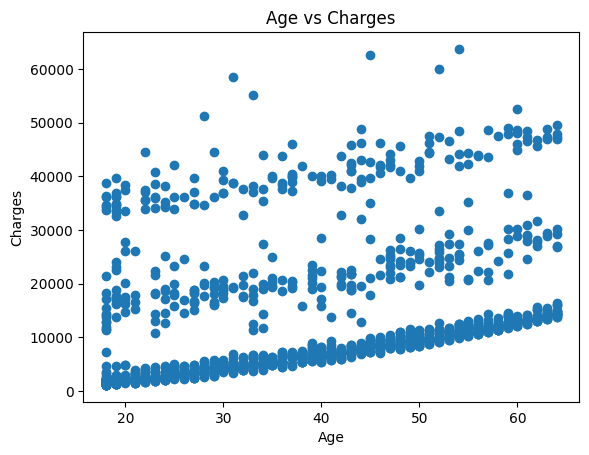

In [16]:
import matplotlib.pyplot as plt
plt.scatter(x=df.age, y=df.charges)
plt.title("Age vs Charges")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

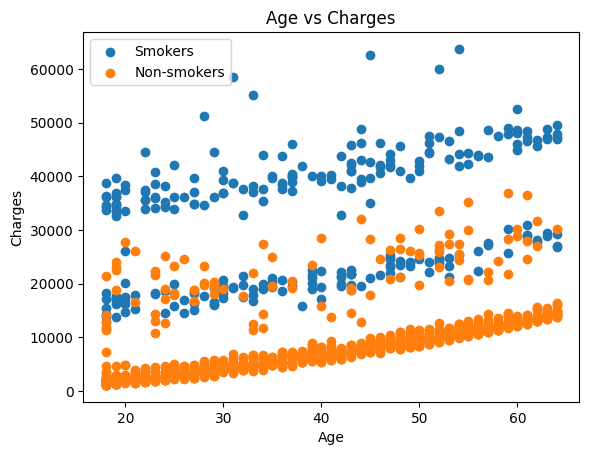

In [19]:
df_smoker = df[df["smoker"] == "yes"]
df_nonsmoker = df[df["smoker"] != "yes"]

plt.scatter(x=df_smoker.age, y=df_smoker.charges, label="Smokers")
plt.scatter(x=df_nonsmoker.age, y=df_nonsmoker.charges, label="Non-smokers")
plt.title("Age vs Charges")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend()
plt.show()

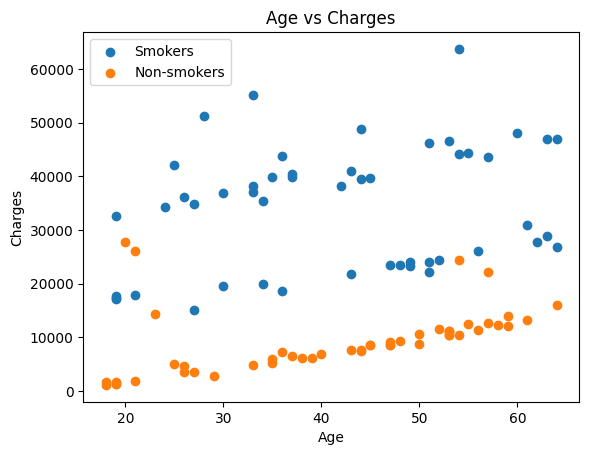

In [20]:
df_smoker_reduced = df_smoker.sample(50)
df_nonsmoker_reduced = df_nonsmoker.sample(50)

plt.scatter(x=df_smoker_reduced.age, y=df_smoker_reduced.charges, label="Smokers")
plt.scatter(x=df_nonsmoker_reduced.age, y=df_nonsmoker_reduced.charges, label="Non-smokers")
plt.title("Age vs Charges")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend()
plt.show()

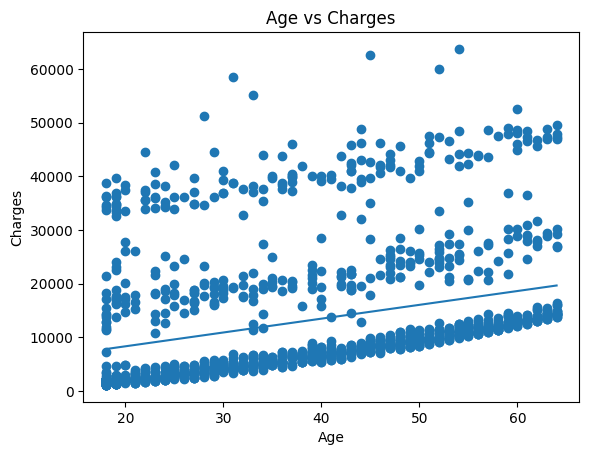

In [25]:
from scipy import stats
m, b, r, p, err = stats.linregress(df.age, df.charges)

x = range(18, 65)
y = m*x + b
plt.plot(x, y)
plt.scatter(x=df.age, y=df.charges)
plt.title("Age vs Charges")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()